In [1]:
%%time
#import useful packages, all of them are important but not necessarily used in this code
#enable inline plotting in Python Notebook
#supress warnings

%pylab inline
import networkx as nx
import numpy as np
import matplotlib
import scipy
import warnings
warnings.filterwarnings('ignore')
import time
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib
CPU times: user 361 ms, sys: 200 ms, total: 561 ms
Wall time: 781 ms


### Run the following cell to download the raw data for the networks (Facebook, Enron Emails, High Energy Physics Citations, and Erdos)
:

In [2]:
%%time
# Creating directories for network files:
import os, errno
try:
    os.makedirs("data")
except OSError as e:
    if e.errno != errno.EEXIST:
        raise
try:
    os.makedirs("data/facebook")
except OSError as e:
    if e.errno != errno.EEXIST:
        raise
        
try:
    os.makedirs("data/enron")
except OSError as e:
    if e.errno != errno.EEXIST:
        raise
try:
    os.makedirs("data/citNet")
except OSError as e:
    if e.errno != errno.EEXIST:
        raise
        
try:
    os.makedirs("data/erdos")
except OSError as e:
    if e.errno != errno.EEXIST:
        raise


# Download the network files:
import urllib

## Facebook Network:
urllib.urlretrieve("https://snap.stanford.edu/data/facebook_combined.txt.gz","data/facebook/facebook_combined.txt.gz")

## Citation Network:
urllib.urlretrieve("http://snap.stanford.edu/data/cit-HepTh.txt.gz", "data/citNet/cit-HepTh.txt.gz")
urllib.urlretrieve("http://snap.stanford.edu/data/cit-HepTh-dates.txt.gz", "data/citNet/cit-HepTh-dates.txt.gz")
urllib.urlretrieve("http://snap.stanford.edu/data/cit-HepTh-abstracts.tar.gz", "data/citNet/cit-HepTh-abstracts.tar.gz")


## Enron Network:
urllib.urlretrieve("https://snap.stanford.edu/data/email-Enron.txt.gz","data/enron/email-Enron.txt.gz")

## Erdos Network:
urllib.urlretrieve("https://files.oakland.edu/users/grossman/enp/Erdos1.html", "data/erdos/Erdos1.html")

CPU times: user 133 ms, sys: 107 ms, total: 241 ms
Wall time: 5.24 s


### Run the following cell to unzip and store the Facebook dateset in a .txt file which is readable by NetworkX:

In [3]:
%%time
# The following code simply converts the data file from ZIP to TXT so that NetworkX can read it

import gzip
inF = gzip.GzipFile("data/facebook/facebook_combined.txt.gz", 'rb')
s = inF.read()
inF.close()

outF = file("data/facebook/facebook_combined.txt", 'wb')
outF.write(s)
outF.close()




CPU times: user 6.32 ms, sys: 4.29 ms, total: 10.6 ms
Wall time: 9.93 ms


In [2]:
#load the network after converting into text file

file_name="data/facebook/facebook_combined.txt"


#convert the information in the text file into a graph, find no. of edges & nodes in the graph

g1=nx.read_edgelist(file_name,create_using=nx.Graph(),nodetype=int)
node, edge=g1.order(),g1.size()
print "No. of nodes are=",node
print "No. of edges are=",edge

No. of nodes are= 4039
No. of edges are= 88234


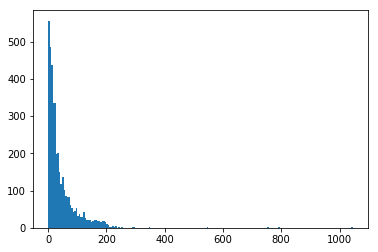

In [3]:

degrees_fb  = dict(g1.degree()).values()
plt.hist(degrees_fb,bins = 200)
plt.show()

In [17]:
print "The average degree is %f" % mean(g1.degree().values())

The average degree is 43.691013


### Determine whether the above graph is connected or not. 

In [4]:
if nx.is_connected(g1):
    print 'The graph is connected'
else:
    print 'The graph is not connected. The largest component is stored in g1_largest'
    g1_largest = max(nx.connected_component_subgraphs(g1), key = len)
    

The graph is connected


### the network diameter and the average shortest path between any two nodes in the network.

In [5]:
g1_dia = nx.diameter(g1)
print 'The diameter of the Facebook data is %d' %g1_dia

The diameter of the Facebook data is 8


In [ ]:
g1_avg_sp = nx.average_shortest_path_length(g1)

In [16]:
print 'The average shortest path length is %f' %g1_avg_sp

The average shortest path length is 3.692507


### to calculate the clustering coeffient of the nodes of the graph and plot it as a histogram.

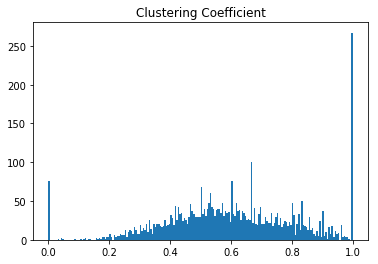

In [6]:
g1_cluster_coeff = nx.clustering(g1)
plt.hist(g1_cluster_coeff.values(), bins = 200)
plt.title("Clustering Coefficient")
plt.show()

In [14]:
print "The average clustering coefficient is %f" % mean(g1_cluster_coeff.values())

The average clustering coefficient is 0.605547


### the degree centrality of the nodes of the graph and plot it as a histogram.

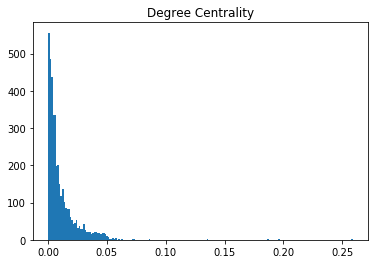

In [18]:
g1_degree_centrality = nx.degree_centrality(g1)
plt.hist(g1_degree_centrality.values(), bins = 200)
plt.title("Degree Centrality")
plt.show()

In [64]:
print "Average degree centrality is %f" %mean(g1_degree_centrality.values())

Average degree centrality is 0.010820


In [20]:
g1_betweenness_centrality = nx.betweenness_centrality(g1)


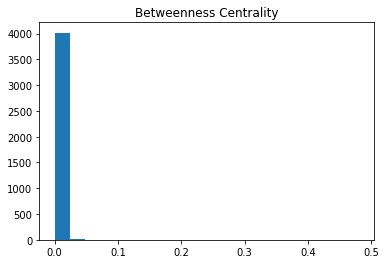

In [21]:
plt.hist(g1_betweenness_centrality.values(), bins = 20)
plt.title("Betweenness Centrality")
plt.show()

In [23]:
print "The average betweenness centrality is %f" %mean(g1_betweenness_centrality.values())

The average betweenness centrality is 0.000667


### the eigenvector centrality 

In [24]:
g1_ev_centrality = nx.eigenvector_centrality(g1)


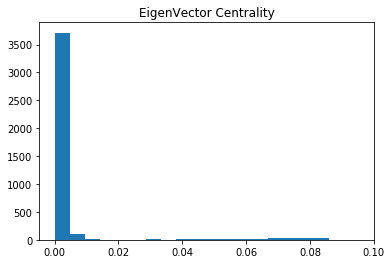

In [25]:
plt.hist(g1_ev_centrality.values(), bins = 20)
plt.title("EigenVector Centrality")
plt.show()

In [26]:
print "The average eigenvector centrality is %f" %mean(g1_ev_centrality.values())

The average eigenvector centrality is 0.003864


###  store the graph in a file that is readable by Gephi 

In [20]:
if isinstance(g1_betweenness_centrality, dict):
    nx.set_node_attributes(g1, g1_betweenness_centrality, 'Betweenness')
else:
    print "g1_betweenNess_centrality is not a dictionary"
    
if isinstance(dict(g1.degree), dict):
    nx.set_node_attributes(g1,dict(g1.degree) , 'Degree')
else:
    print "g1_betweenNess_centrality is not a dictionary"

In [42]:
nx.write_gml(g1,"Faceboook.gml")

### Erdos

In [27]:
%%time
# build Collaboration Network
# undirected network
g = nx.Graph()

# add Paul Erdos into our network at first
dict_authors = {}
dict_authors['Paul Erdos'] = 0
g.add_node(0)
g.node[0]['author'] = 'Paul Erdos'

# add the authors with Erdos number 1 and 2 from file
line_count = 1
skip_line = 24
skip_space = 1

is_new = False
author = ""
coauthor = ""
index = 1
ind_author = 1
ind_coauthor = 1

def parseLine(l, start):
    end = start
    while end < len(l) - 1 and not (l[end] == ' ' and l[end + 1] == ' '):
        end += 1
    return l[start:end]

def addAuthor(auth, ind):
    if auth in dict_authors:
        return ind
    dict_authors[auth] = ind
    return ind + 1

for l in open("data/erdos/Erdos1.html"):    
    if line_count >= skip_line:
        if l == '\n':
            is_new = True
        elif is_new:
            author = parseLine(l, 0)
            index = addAuthor(author, index)
            ind_author = dict_authors[author]
            g.add_edge(0, ind_author)
            g.node[ind_author]['author'] = author
            is_new = False
        elif l == '</pre>':
            break
        else:
            coauthor = parseLine(l, skip_space)
            index = addAuthor(coauthor, index)
            ind_coauthor = dict_authors[coauthor]
            g.add_edge(ind_author, ind_coauthor)
            g.node[ind_coauthor]['author'] = coauthor
    line_count += 1

CPU times: user 264 ms, sys: 8.07 ms, total: 272 ms
Wall time: 275 ms


In [28]:
print nx.info(g)

Name: 
Type: Graph
Number of nodes: 11524
Number of edges: 18504
Average degree:   3.2114


In [7]:
from multiprocessing import Pool
import itertools

def chunks(l, n):
    """Divide a list of nodes `l` in `n` chunks"""
    l_c = iter(l)
    while 1:
        x = tuple(itertools.islice(l_c, n))
        if not x:
            return
        yield x
        
def _betmap(G_normalized_weight_sources_tuple):
    """Pool for multiprocess only accepts functions with one argument.
    This function uses a tuple as its only argument. We use a named tuple for
    python 3 compatibility, and then unpack it when we send it to
    `betweenness_centrality_source`
    """
    return nx.betweenness_centrality_subset(*G_normalized_weight_sources_tuple)

def betweenness_centrality_parallel(G, processes=4):
    """Parallel betweenness centrality function"""
    p = Pool(processes=processes)
    node_divisor = len(p._pool)*4
    node_chunks = list(chunks(G.nodes(), int(G.order()/node_divisor)))
    # print node_chunks
    num_chunks = len(node_chunks)
    
    bt_sc = p.map(_betmap,
                 zip([G]*num_chunks,
                    node_chunks,
                    [list(G)]*num_chunks,
                    [True]*num_chunks,
                    [None]*num_chunks))
    
    # print bt_sc
    # Reduce the partial solutions
    bt_c = bt_sc[0]
    for bt in bt_sc[1:]:
        for n in bt:
            bt_c[n] += bt[n]
    return bt_c

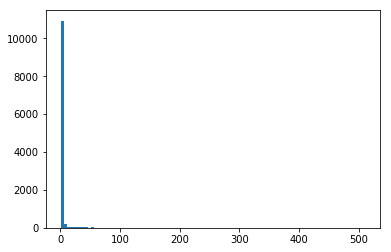

In [29]:
degrees_erdos  = (g.degree()).values()
plt.hist(degrees_erdos,bins = 100)
plt.show()

In [30]:
print "The mean degree is %f" %mean(degrees_erdos)

The mean degree is 3.211385


In [29]:
if nx.is_connected(g):
    print 'The graph is connected'
else:
    print 'The graph is not connected. The largest component is stored in g_largest'
    g_largest = max(nx.connected_component_subgraphs(g), key = len)
    

The graph is connected


In [31]:
erdos_dia = nx.diameter(g)


print 'The diameter of the Erdos data is %d' %erdos_dia

The diameter of the Erdos data is 4


In [ ]:
erdos_avg_sp = nx.average_shortest_path_length(g)

In [46]:
print 'The average shortest path length is %f' %erdos_avg_sp

The average shortest path length is 3.821987


### the clustering coeffient of the nodes of the graph 

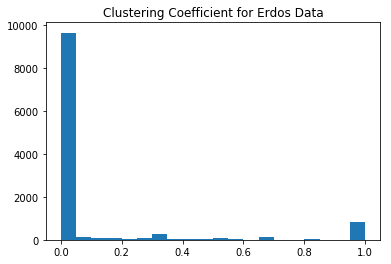

In [32]:
erdos_cluster_coeff = nx.clustering(g)
plt.hist(erdos_cluster_coeff.values(), bins = 20)
plt.title("Clustering Coefficient for Erdos Data")
plt.show()

In [33]:
print "The average clustering coefficient is %f" %mean(erdos_cluster_coeff.values())

The average clustering coefficient is 0.105870


### calculate the degree centrality 

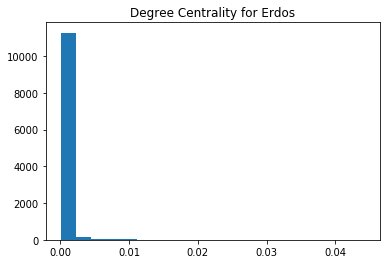

In [37]:
erdos_degree_centrality = nx.degree_centrality(g)
plt.hist(erdos_degree_centrality.values(), bins = 20)
plt.title("Degree Centrality for Erdos")
plt.show()

In [65]:
print "The average degree centrality is %f" %mean(erdos_degree_centrality.values())

The average degree centrality is 0.000279


In [38]:
import pickle
with open('erdos_stuff.pkl', 'rb') as f:
    degrees_erdos = pickle.load( f)
    erdos_dia = pickle.load( f)
    erdos_avg_sp = pickle.load( f)
    erdos_cluster_coeff = pickle.load( f)
    erdos_degree_centrality = pickle.load( f)
    erdos_betweenness_centrality = pickle.load( f)
    erdos_ev_centrality = pickle.load( f)

### the betweenness centrality

In [ ]:
%%time
erdos_betweenness_centrality = betweenness_centrality_parallel(g)

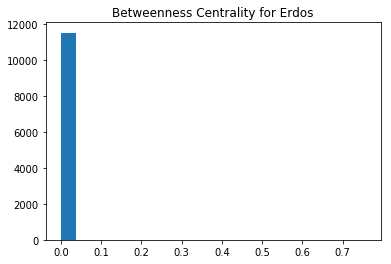

In [40]:
plt.hist(erdos_betweenness_centrality.values(), bins = 20)
plt.title("Betweenness Centrality for Erdos")
plt.show()

In [41]:
print "The average betweenness centrality is %f" %mean(erdos_betweenness_centrality.values())

The average betweenness centrality is 0.000245


### EV centrality of the nodes 

In [ ]:
erdos_ev_centrality = nx.eigenvector_centrality(g)

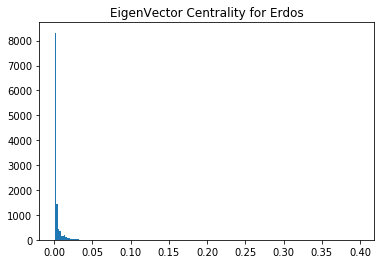

In [42]:
plt.hist(erdos_ev_centrality.values(), bins = 200)
plt.title("EigenVector Centrality for Erdos")
plt.show()

In [43]:
print "The average EV centrality is %f" %mean(erdos_ev_centrality.values())

The average EV centrality is 0.003226


### store the graph in a file that is readable by Gephi 

In [53]:
if isinstance(erdos_betweenness_centrality, dict):
    nx.set_node_attributes(g,  'Betweenness', erdos_betweenness_centrality)
else:
    print "erdos_betweenNess_centrality is not a dictionary"
    
if isinstance(g.degree(), dict):
    nx.set_node_attributes(g, 'Degree', g.degree() )
else:
    print "g.degree() is not a dictionary"

nx.write_gml(g,"Erdos.gml")

import pickle

with open('erdos_stuff.pkl', 'wb') as f:
    pickle.dump(degrees_erdos, f)
    pickle.dump(erdos_dia, f)
    pickle.dump(erdos_avg_sp, f)
    pickle.dump(erdos_cluster_coeff, f)
    pickle.dump(erdos_degree_centrality, f)
    pickle.dump(erdos_betweenness_centrality, f)
    pickle.dump(erdos_ev_centrality, f)
    

# Enron Network (g2) 

In [ ]:
%%time
# The following code simply converts the data file from ZIP to TXT so that NetworkX can read it

import gzip
inF = gzip.GzipFile("data/enron/email-Enron.txt.gz", 'rb')
s = inF.read()
inF.close()

outF = file("data/enron/email-Enron.txt", 'wb')
outF.write(s)
outF.close()



In [83]:

#load the network after converting into text file

file_name="data/enron/email-Enron.txt"

#convert the information in the text file into a graph, find no. of edges & nodes in the graph

g2=nx.read_edgelist(file_name,create_using=nx.Graph(),nodetype=int)
node, edge=g2.order(),g2.size()
print "No. of nodes are=",node
print "No. of edges are=",edge

No. of nodes are= 36692
No. of edges are= 183831


In [48]:
with open('enron_stuff.pkl', 'rb') as f:
    enron_degrees = pickle.load( f)
    enron_cluster_coeff = pickle.load( f)
    enron_degree_centrality = pickle.load( f)
    enron_betweenness_centrality = pickle.load(f)
    enron_ev_centrality = pickle.load(f)
    

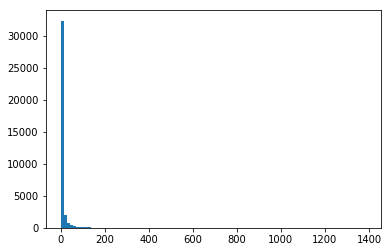

In [84]:
enron_degrees  = (g2.degree()).values()
plt.hist(enron_degrees,bins = 100)
plt.show()

In [49]:
print "The average degree is %f" %mean(enron_degrees)

The average degree is 10.020222


In [85]:
if nx.is_connected(g2):
    print 'The graph is connected'
else:
    print 'The graph is not connected. The largest component is stored in g2_largest'
    g2_largest = max(nx.connected_component_subgraphs(g2), key = len)
 

The graph is not connected. The largest component is stored in g2_largest


In [91]:
if nx.is_connected(g2):
    enron_dia = nx.diameter(g2)
    print 'The diameter of the Enron data is %d' %enron_dia
    enron_avg_sp = nx.average_shortest_path_length(g2)
    print 'The average shortest path length is %d' %enron_avg_sp
else:
    print 'The graph is not connected. The largest component is stored in g2_largest'



The graph is not connected. The largest component is stored in g2_largest


The diameter is infiinity. 

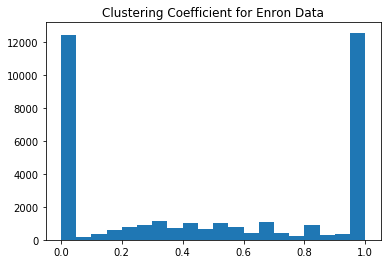

In [92]:
enron_cluster_coeff = nx.clustering(g2)
plt.hist(enron_cluster_coeff.values(), bins = 20)
plt.title("Clustering Coefficient for Enron Data")
plt.show()

In [50]:
print "The average clustering coefficient is %f" %mean(enron_cluster_coeff.values())

The average clustering coefficient is 0.496983


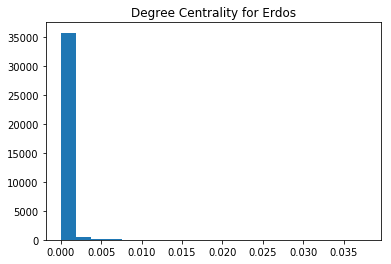

In [93]:
enron_degree_centrality = nx.degree_centrality(g2)
plt.hist(enron_degree_centrality.values(), bins = 20)
plt.title("Degree Centrality for Erdos")
plt.show()

In [66]:
print "Average degree centrality is %f" %mean(enron_degree_centrality.values())

Average degree centrality is 0.000273


In [ ]:
%%time
enron_betweenness_centrality = betweenness_centrality_parallel(g2)

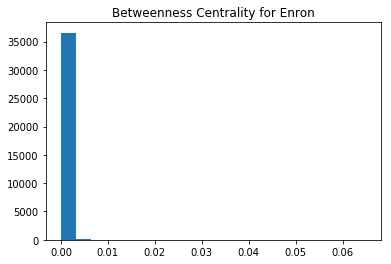

In [96]:
plt.hist(enron_betweenness_centrality.values(), bins = 20)
plt.title("Betweenness Centrality for Enron")
plt.show()

In [51]:
print "The average betweenness centrality is %f" %mean(enron_betweenness_centrality.values())

The average betweenness centrality is 0.000070


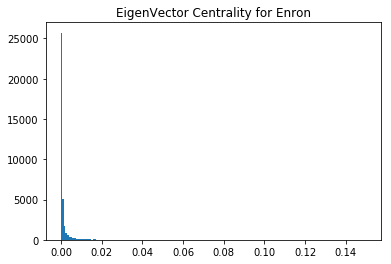

In [97]:
enron_ev_centrality = nx.eigenvector_centrality(g2)


plt.hist(enron_ev_centrality.values(), bins = 200)
plt.title("EigenVector Centrality for Enron")
plt.show()

In [52]:
print "The average EV centrality is %f" % mean(enron_ev_centrality.values())

The average EV centrality is 0.001447


In [99]:
if isinstance(enron_betweenness_centrality, dict):
    nx.set_node_attributes(g2,  'Betweenness', enron_betweenness_centrality)
else:
    print "enron_betweenNess_centrality is not a dictionary"
    
if isinstance(g2.degree(), dict):
    nx.set_node_attributes(g2, 'Degree', g2.degree() )
else:
    print "g2.degree() is not a dictionary"

nx.write_gml(g2,"Enron.gml")

In [103]:
import pickle

with open('enron_stuff.pkl', 'wb') as f:
    pickle.dump(enron_degrees, f)
    pickle.dump(enron_cluster_coeff, f)
    pickle.dump(enron_degree_centrality, f)
    pickle.dump(enron_betweenness_centrality, f)
    pickle.dump(enron_ev_centrality, f)
    

# Citation Network  

In [53]:
with open('cit_stuff.pkl', 'rb') as f:
    cit_degrees = pickle.load(f)
    cit_cluster_coeff = pickle.load(f)
    cit_degree_centrality = pickle.load(f)
    cit_betweenness_centrality = pickle.load(f)
    cit_ev_centrality = pickle.load(f)

    

In [104]:
%%time
# The following code simply converts the data file from ZIP to TXT so that NetworkX can read it

import gzip
inF = gzip.GzipFile("data/citNet/cit-HepTh.txt.gz", 'rb')
s = inF.read()
inF.close()

outF = file("data/citNet/cit-HepTh.txt", 'wb')
outF.write(s)
outF.close()



CPU times: user 33.8 ms, sys: 32.1 ms, total: 65.8 ms
Wall time: 69.8 ms


In [54]:

#load the network after converting into text file

file_name="data/citNet/cit-HepTh.txt"

#convert the information in the text file into a graph, find no. of edges & nodes in the graph

g3=nx.read_edgelist(file_name,create_using=nx.DiGraph(),nodetype=int)
node, edge=g3.order(),g3.size()
print "No. of nodes are=",node
print "No. of edges are=",edge

No. of nodes are= 27770
No. of edges are= 352807


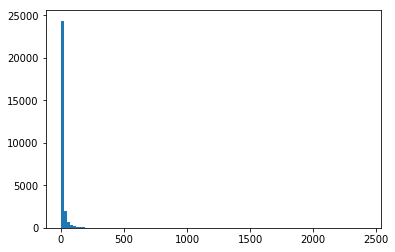

In [55]:
cit_degrees  = (g3.in_degree()).values()
plt.hist(cit_degrees,bins = 100)
plt.show()

In [56]:
print "The average in degree is %f" %mean(cit_degrees)

The average in degree is 12.704609


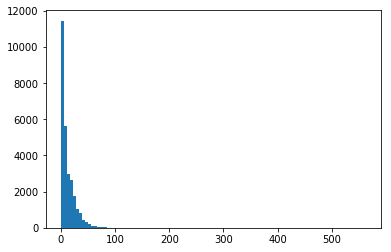

In [57]:
cit_degrees  = (g3.out_degree()).values()
plt.hist(cit_degrees,bins = 100)
plt.show()

In [58]:
print "The average out degree is %f" %mean(cit_degrees)

The average out degree is 12.704609


In [118]:
g3_undirected = nx.Graph(g3)

In [119]:
if nx.is_connected(g3_undirected):
    print 'The graph is connected'
else:
    print 'The graph is not connected. The largest component of the undirected graph is stored in g3_largest'
    g3_largest = max(nx.connected_component_subgraphs(g3_undirected), key = len)
 

The graph is not connected. The largest component of the undirected graph is stored in g3_largest


In [120]:
if nx.is_connected(g3_undirected):
    cit_dia = nx.diameter(g3)
    print 'The diameter of the Enron data is %d' %cit_dia
    cit_avg_sp = nx.average_shortest_path_length(g3)
    print 'The average shortest path length is %d' %cit_avg_sp
else:
    print 'The graph is not connected. The largest component is stored in g3_largest'



The graph is not connected. The largest component is stored in g3_largest


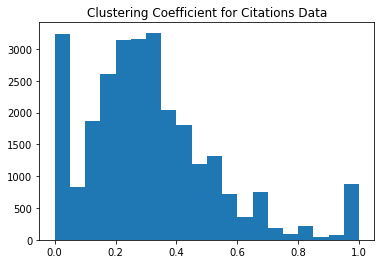

In [122]:
cit_cluster_coeff = nx.clustering(g3_undirected)
plt.hist(cit_cluster_coeff.values(), bins = 20)
plt.title("Clustering Coefficient for Citations Data")
plt.show()

In [59]:
print "The average clustering coefficient is %f" %mean(cit_cluster_coeff.values())

The average clustering coefficient is 0.312019


In [ ]:
cit_degree_centrality = nx.in_degree_centrality(g3)

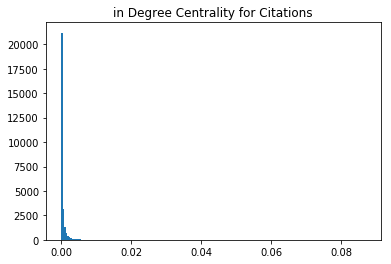

In [60]:
plt.hist(cit_degree_centrality.values(), bins = 200)
plt.title("in Degree Centrality for Citations")
plt.show()

In [67]:
print "Average in degree centrality is %f " %mean(cit_degree_centrality.values())

Average in degree centrality is 0.000458 


In [125]:
%%time
cit_betweenness_centrality = betweenness_centrality_parallel(g3)

CPU times: user 49.9 s, sys: 3.82 s, total: 53.7 s
Wall time: 1h 31min 13s


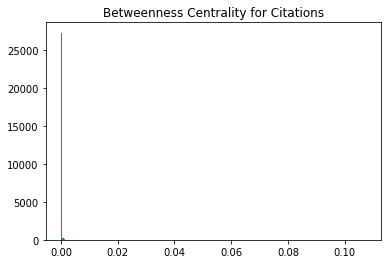

In [127]:
plt.hist(cit_betweenness_centrality.values(), bins = 200)
plt.title("Betweenness Centrality for Citations DIRECTED graph")
plt.show()

In [62]:
print "The average betweenness centrality is %f" %mean(cit_betweenness_centrality.values())

The average betweenness centrality is 0.000078


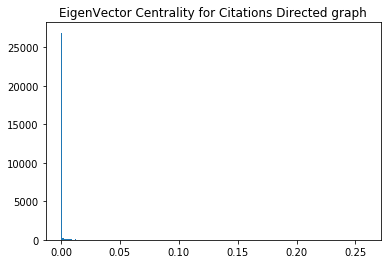

In [128]:
cit_ev_centrality = nx.eigenvector_centrality(g3)


plt.hist(cit_ev_centrality.values(), bins = 200)
plt.title("EigenVector Centrality for Citations Directed graph")
plt.show()

In [63]:
print "The average EV centrality is %f" %mean(cit_ev_centrality.values())

The average EV centrality is 0.000509


In [11]:
if isinstance(cit_betweenness_centrality, dict):
    nx.set_node_attributes(g3,  'Betweenness', cit_betweenness_centrality)
else:
    print "cit_betweenNess_centrality is not a dictionary"
    
if isinstance(g3.in_degree(), dict):
    nx.set_node_attributes(g3, 'Degree', g3.in_degree() )
else:
    print "g3.degree() is not a dictionary"
    
    



In [133]:
import pickle

with open('cit_stuff.pkl', 'wb') as f:
    pickle.dump(cit_degrees, f)
    pickle.dump(cit_cluster_coeff, f)
    pickle.dump(cit_degree_centrality, f)
    pickle.dump(cit_betweenness_centrality, f)
    pickle.dump(cit_ev_centrality, f)
    

In [9]:
import pickle
with open('cit_stuff.pkl', 'rb') as f:
    cit_degrees = pickle.load(f)
    cit_cluster_coeff = pickle.load(f)
    cit_degree_centrality = pickle.load(f)
    cit_betweenness_centrality = pickle.load(f)
    cit_ev_centrality = pickle.load(f)

    

### Extract Author names from text files 

In [38]:
import os
parent_dir = (str('data/citNet/cit-HepTh-abstracts/'))
id_authors = dict()
for year  in os.listdir(parent_dir):
    year_dir = str('%s/%s' %(parent_dir, year))
    if os.path.isdir(year_dir):
        for filename in os.listdir(year_dir):
            file_path =  str('%s/%s' %(year_dir, filename))
            if os.path.isfile(file_path):
                with open(file_path, 'r') as fp:
                    for i, line in enumerate(fp):
                        if line[:6] == "Author":
                            paper_id = int(filename[:-4])
                            if paper_id in g3.nodes():
                                id_authors[paper_id] = line[8:].strip()
                            




In [40]:
if isinstance(id_authors, dict):
    nx.set_node_attributes(g3, 'author', id_authors )
else:
    print "id_authors is not a dictionary"
    
    

In [41]:
nx.write_gml(g3,"cit_with_authors.gml")